# Recreating Images from Article 

## The following code recreates graph 1a of the research paper. 

https://genome.cshlp.org/content/27/7/1139/F2.expansion.html


Text(0.5, 0, 'Cell Type')


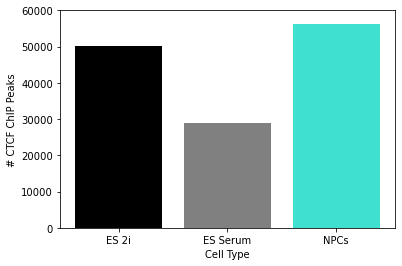

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df_es_2i1_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S5.xlsx', header = 3)
df_es_serum_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S6.xlsx', header = 3)
df_npc1_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S7.xlsx', header = 3)
df_es2i2_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S8.xlsx', header = 3)
df_npc2_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S9.xlsx', header = 3)
df_es2iess_ctcf = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S10.xlsx', header = 3)
df_all_peaks = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S11.xlsx', header = 3)
df_yy1npc_peaks = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S12.xlsx', header = 3)
df_yy1esserum_peaks= pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S13.xlsx', header = 3)
df_es_enhancer_annotations = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S14.xlsx', header = 3)
df_npc_enhancer_annotations = pd.read_excel(r'~/Documents/SuppTables/Supplemental_Table_S15.xlsx', header = 3)


    
esserum_val = df_es_serum_ctcf.shape[0]
npc_val = df_npc1_ctcf.shape[0]
es2i_val = df_es_2i1_ctcf.shape[0]

df1 = {'Cell Type':[ 'ES 2i', 'ES Serum', 'NPCs'],'# CTCF ChIP Peaks': [esserum_val, npc_val,es2i_val ]}

fig1 = plt.bar(df1['Cell Type'], df1['# CTCF ChIP Peaks'], color=['Black', 'Grey', 'Turquoise'])
fig1 = plt.ylabel('# CTCF ChIP Peaks')
fig1 = plt.xlabel('Cell Type')
ay = plt.gca()
ay.set_ylim([0,60000])


print(fig1)


In [63]:
df_npc1_ctcf

,#chr,start,end,name,score,signalValue,pValue,qValue,peak,Unnamed: 9,28860
0,chr1,4322662,4322893,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,144,6.87500,14.42945,11.63835,113,NaN,NaN
1,chr1,4336371,4336522,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,179,8.91892,17.99991,15.11715,105,NaN,NaN
2,chr1,4373031,4373165,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,179,8.91892,17.99991,15.11715,35,NaN,NaN
3,chr1,4506748,4506933,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,402,18.21393,40.26894,36.92000,64,NaN,NaN
4,chr1,4758436,4758774,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,790,25.94595,79.08524,74.76299,201,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28855,chrX,166236954,166237110,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,191,10.48681,19.14016,16.23458,73,NaN,NaN
28856,chrX,166300933,166301115,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,304,15.00000,30.41432,27.27226,68,NaN,NaN
28857,chrX,166417046,166417363,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,445,12.74958,44.51430,41.07328,205,NaN,NaN
28858,chrX,166424734,166425255,Project004-IPSHOCH-Exp5-ChIP-NPC-CTCF-IP-Blobe...,938,12.65306,93.85211,89.16364,371,NaN,NaN


## The following code is for graph 2a of the research paper. 

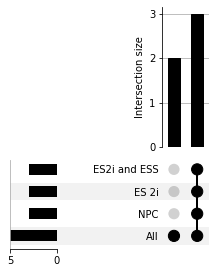

In [55]:
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import UpSet

df2 = from_contents({'NPC': df_npc2_ctcf, 'ES 2i': df_es2i2_ctcf, 'ES2i and ESS': df_es2iess_ctcf, 'All': df_all_peaks})
df2

plt = UpSet(df2, subset_size='count').plot()

#I think the ES Serum data is missing. I cannot find it in any of the excel files. Here is an attempt of an upset plot. 

In [88]:
import bioframe
import numpy as np

bb1 = bioframe.count_overlaps(df_es_serum_ctcf, df_es_2i1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb1.rename(columns={'count':'count1'},inplace=True)
bb1 = bioframe.count_overlaps(bb1, df_npc1_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb1.rename(columns={'count':'count_es_npc'},inplace=True)

np.sum( (bb1['count1']==0) * (bb1['count_es_npc']==0))

#This value is for ES Serum only. 

3177

In [89]:
bb1a = bioframe.count_overlaps(df_es_serum_ctcf, df_es_2i1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb1a.rename(columns={'count':'count1'},inplace=True)
bb1a = bioframe.count_overlaps(bb1a, df_npc1_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb1a.rename(columns={'count':'count_es_npc'},inplace=True)

np.sum( (bb1a['count1']==1) * (bb1a['count_es_npc']==0))

#This value is for ES Serum and ES 2i.  

20101

In [93]:
bb2a = bioframe.count_overlaps(df_npc1_ctcf, df_es_serum_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2a.rename(columns={'count':'count2a'},inplace=True)
bb2a = bioframe.count_overlaps(bb2a, df_npc1_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2a.rename(columns={'count':'count_npc'},inplace=True)
np.sum( (bb2a['count2a']==0) * (bb2a['count_npc']==0))

#This value is for ES 2i only. 

0

In [96]:
bb2a = bioframe.count_overlaps(df_es_serum_ctcf, df_npc1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2a.rename(columns={'count':'count2a'},inplace=True)
bb2a = bioframe.count_overlaps(bb2a, df_npc1_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2a.rename(columns={'count':'count_npc'},inplace=True)
np.sum( (bb2a['count2a']==1) * (bb2a['count_npc']==0))

#This value is for ES 2i only. 

0

In [65]:
bb2 = bioframe.count_overlaps(df_es_2i1_ctcf, df_npc1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2.rename(columns={'count':'count2'},inplace=True)
bb2 = bioframe.count_overlaps(bb2, df_es_serum_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2.rename(columns={'count':'count_es_serum'},inplace=True)
np.sum( (bb2['count2']==0) * (bb2['count_es_serum']==0))

#This value is for ES 2i only. 

8832

In [68]:
bb2 = bioframe.count_overlaps(df_es_2i1_ctcf, df_npc1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2.rename(columns={'count':'count2'},inplace=True)
bb2 = bioframe.count_overlaps(bb2, df_es_serum_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb2.rename(columns={'count':'count_es_serum'},inplace=True)
np.sum( (bb2['count2']==1) * (bb2['count_es_serum']==0))

#This value is for ES 2i and NPC.

641

In [63]:
bb3 = bioframe.count_overlaps(df_npc1_ctcf, df_es_2i1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb3.rename(columns={'count':'count3'},inplace=True)
bb3 = bioframe.count_overlaps(bb3, df_es_serum_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb3.rename(columns={'count':'count_es_serum'},inplace=True)
np.sum( (bb3['count3']==0) * (bb3['count_es_serum']==0))

#This value is for NPC only. 

1119

In [98]:
bb3 = bioframe.count_overlaps(df_npc1_ctcf, df_es_2i1_ctcf, cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb3.rename(columns={'count':'count3'},inplace=True)
bb3 = bioframe.count_overlaps(bb3, df_es_serum_ctcf
                             
                             , cols1=['#chr','start','end'],
                       cols2=['#chr','start','end'])
bb3.rename(columns={'count':'count_es_serum'},inplace=True)
np.sum( (bb3['count3']==1) * (bb3['count_es_serum']==0))

#This value is for NPC and ES_2i. 
#I am not sure I understand why I get two different values when I switch the data frame order and am doing left join essentially. 

646

In [48]:
bioframe.overlap( bioframe.overlap( a, b), c)

NameError: name 'a' is not defined

3594

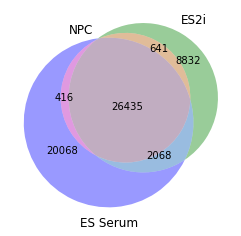

In [60]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

npconly = df_npc2_ctcf.shape[0]
es2ionly = df_es2i2_ctcf.shape[0]
es2iess = df_es2iess_ctcf.shape[0]
all = df_all_peaks.shape[0]

venn3(subsets = (npconly,es2ionly,641, es2iess, 416, 2068, all), set_labels = ('NPC', 'ES2i', "ES Serum"))
plt.show()

#Upset plots seem useful, but I wanted to recreate the venn diagram. Here it is. 